# 最小二乗法に基づいたオドメトリのキャリブレーション

## 条件
対向二輪型ロボット

## 数式

左右車輪の角速度から、ロボット中心の速度と角速度を計算

$$
\begin{equation}
	\left[
		\begin{array}{c}
			\upsilon \\
			\omega
		\end{array}
	\right]
	= \boldsymbol{C}\left[
		\begin{array}{c}
			\omega_{R} \\
			\omega_{L}
		\end{array}
	\right]
\end{equation}
$$

推定したいオドメトリのパラメータ

$$
\begin{equation}
	\small
	\boldsymbol{C}
	= \left[
		\begin{array}{cc}
			\displaystyle \frac{r_{R}}{2} &  \displaystyle \frac{r_{L}}{2} \\
			\displaystyle \frac{r_{R}}{b} & \displaystyle -\frac{r_{L}}{b}
			%r_{R}/2 &  r_{L}/2 \\
			%r_{R}/b & -r_{L}/b
		\end{array}
	\right]
\end{equation}
$$

最小二乗法を用いてパラメータ推定１

\begin{equation}
	\left[
		\begin{array}{c}
			c_{2,1} \\
			c_{2,2}
		\end{array}
	\right]
	= (\boldsymbol{{\it \overline{\Phi}^{\mathrm{T}}_{\theta}}}
	\boldsymbol{{\it \overline{\Phi}_{\theta}}})^{-1}
	\boldsymbol{{\it \overline{\Phi}^{\mathrm{T}}_{\theta}}}
	\left[
		\begin{array}{c}
			\theta_{N,1} - \theta_{0,1} \\
			\vdots \\
			\theta_{N,P} - \theta_{0,P}
		\end{array}
	\right]
\end{equation}

\begin{equation}
	\boldsymbol{{\it \Phi}} = T\left[
		\begin{array}{cc}
			\displaystyle \sum_{i=0}^{N-1}\omega_{R,i} & \displaystyle \sum_{i=0}^{N-1}\omega_{L,i} \\
		\end{array}
	\right]
\end{equation}

\begin{equation}
\boldsymbol{{\it \overline{\Phi}_{\theta}}} = \left[
		\begin{array}{c}
			\boldsymbol{{\it \Phi_{1}}} \\
			\vdots \\
			\boldsymbol{{\it \Phi_{P}}}
		\end{array}
	\right]
\end{equation}

最小二乗法を用いてパラメータ推定２

\begin{equation}
	\left[
		\begin{array}{c}
			c_{1,1} \\
			c_{1,2}
		\end{array}
	\right]
	= (\boldsymbol{{\it \overline{\Phi}^{\mathrm{T}}_{xy}}}
	\boldsymbol{{\it \overline{\Phi}_{xy}}})^{-1}
	\boldsymbol{{\it \overline{\Phi}^{\mathrm{T}}_{xy}}}
	\left[
		\begin{array}{c}
			x_{N,1} - x_{0,1} \\
			\vdots \\
			x_{N,P} - x_{0,P}
		\end{array}
	\right]
\end{equation}

\begin{equation}
	\boldsymbol{{\it \Phi}}
	= T\left[
		\begin{array}{cc}
		\displaystyle \sum_{i=0}^{N-1}\omega_{R,i}\cos({\theta_{i} + T\omega_{i}/2})
		& \displaystyle \sum_{i=0}^{N-1}\omega_{L,i}\cos({\theta_{i} + T\omega_{i}/2}) \\
		\displaystyle \sum_{i=0}^{N-1}\omega_{R,i}\sin({\theta_{i} + T\omega_{i}/2})
		& \displaystyle \sum_{i=0}^{N-1}\omega_{L,i}\sin({\theta_{i} + T\omega_{i}/2})
		\end{array}
	\right]
\end{equation}

\begin{equation}
\boldsymbol{{\it \overline{\Phi}_{xy}}} = \left[
		\begin{array}{c}
			\boldsymbol{{\it \Phi_{1}}} \\
			\vdots \\
			\boldsymbol{{\it \Phi_{P}}}
		\end{array}
	\right]
\end{equation}

速度と角速度を補正するように変形

\begin{equation}
	\left[
		\begin{array}{c}
			\upsilon_{n} \\
			\omega_{n}
		\end{array}
	\right]
	= \left[
		\begin{array}{cc}
			\displaystyle \frac{\hat{r_{R}}}{2} &  \displaystyle \frac{\hat{r_{L}}}{2} \\
			\displaystyle \frac{\hat{r_{R}}}{\hat{b}} & \displaystyle -\frac{\hat{r_{L}}}{\hat{b}}
			%r_{R}/2 &  r_{L}/2 \\
			%r_{R}/b & -r_{L}/b
		\end{array}
	\right]
    \left[
		\begin{array}{c}
			\omega_{R} \\
			\omega_{L}
		\end{array}
	\right]
\end{equation}

$$
\begin{equation}
	\left[
		\begin{array}{c}
			\upsilon \\
			\omega
		\end{array}
	\right]
	= \boldsymbol{\overline{C}}
    \left[
		\begin{array}{c}
			\upsilon_{n} \\
			\omega_{n}
		\end{array}
	\right]
\end{equation}
$$

\begin{equation}
	\small
	\boldsymbol{\overline{C}}
	= \left[
		\begin{array}{cc}
			\displaystyle \frac{r_{R}}{2\hat{r}_{R}} + \frac{r_{L}}{2\hat{r}_{L}}
            &  \displaystyle \frac{\hat{b}r_{R}}{4\hat{r}_{R}} - \frac{\hat{b}r_{L}}{4\hat{r}_{L}} \\
			\displaystyle \frac{r_{R}}{b\hat{r}_{R}} - \frac{r_{L}}{b\hat{r}_{L}}
            &  \displaystyle \frac{\hat{b}r_{R}}{2b\hat{r}_{R}} + \frac{\hat{b}r_{L}}{2b\hat{r}_{L}} \\
			%r_{R}/2 &  r_{L}/2 \\
			%r_{R}/b & -r_{L}/b
		\end{array}
	\right]
\end{equation}

とりあえずCは単位行列？

## 実装

In [1]:
# 描画のために必要になるもの
import matplotlib
matplotlib.use('nbagg')
import matplotlib.animation as anm
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 計算で必要になるもの
import numpy as np
import math
from scipy.stats import expon, norm

In [2]:
# 世界座標系におけるオブジェクト（ロボットやランドマーク）の管理を行うクラス
class World:
    def __init__(self, time_span, time_interval, debug=False):
        self.objects = [] # オブジェクトを入れる配列
        self.debug = debug # デバッグ用フラグ
        self.time_span = time_span # シミュレーション時間[s]
        self.time_interval = time_interval # サンプリング間隔
        
    # 配列にオブジェクトを追加する関数
    def append(self, obj):
        self.objects.append(obj)
        
    # 図の設定を行い、オブジェクトを描画する関数
    def draw(self):
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111)
        ax.set_aspect('equal')
        ax.set_xlim(-5,5)
        ax.set_ylim(-5,5)
        ax.set_xlabel("X", fontsize=20)
        ax.set_ylabel("Y", fontsize=20)
        
        # オブジェクトリスト
        elems = []
        
        #debug:Trueならばエラーメッセージが出力される
        if self.debug: # アニメーションなしで処理
            for i in range(1000):
                self.one_step(i, elems, ax)
        else: # アニメーションありで処理, frames:アニメのフレーム数（何回更新するか）、interval:フレーム間の時間
            self.ani = anm.FuncAnimation(fig, self.one_step, fargs=(elems, ax), frames=int(self.time_span/self.time_interval)+1,
                                         interval=int(self.time_interval*1000), repeat=False)     
            plt.show()
       
    # アニメーションの1ステップの処理、iはステップ番号、elemsはオブジェクトリスト、axはサブプロット
    def one_step(self, i, elems, ax):
        # elemsの中身をすべて破棄
        while elems:
            elems.pop().remove()
        # 時間テキストを追加
        time_str = "t = %.2f[s]" % (self.time_interval*i)
        elems.append(ax.text(-4.4, 4.5, time_str, fontsize=10))
        # オブジェクトを描画
        for obj in self.objects:
            obj.draw(ax, elems)
            if hasattr(obj, "one_step"):
                obj.one_step(1.0)

In [3]:
# 標準的なロボットクラス
class IdealRobot:
    # 初期化する関数
    def __init__(self, name="Name", nw=np.array([0.0,0.0]), pose=np.array([0.0,0.0,0.0]).T, sensor=None, color="black", isBias=False):
        # ロボットの情報を初期化（位置姿勢、半径、色、エージェント、poseリスト）
        self.pose = pose
        self.r = 0.2
        self.color = color
        self.poses = [pose]
        self.sensor = sensor
        # 左右車輪の角速度からロボットの中心の速度と角速度を求める
        self.name = name
        self.rR = 0.5
        self.rL = 0.5
        self.B = 1.0
        #self.wrl = wrl
        self.sum_nw_theta = np.array([0.0, 0.0])
        self.sum_nw_xy = np.array([[0.0, 0.0], [0.0, 0.0]])
        #self.c = np.array([[self.rR/2.0,self.rL/2.0],[self.rR/self.B,-1.0*self.rL/self.B]])
        self.c = np.array([[1.0, 0.0], [0.0, 1.0]])
        self.nw = nw
        self.isBias = isBias
        # リスト
        self.sum_nw_theta_s = []
        self.sum_nw_xy_s = []
        self.theta_s = []
        self.xy_s = []
        
    def set_wrl(self, wrl):
        self.wrl = wrl
       
    def set_isBias(self, isBias):
        self.isBias = isBias
    
    def init_func(self):
        self.pose = np.array([0.0, -4.0, math.pi/2.0]).T
        #self.nw = np.array([0.0, 0.0])
        self.poses = [self.pose]
        self.sum_nw_theta = np.array([0.0, 0.0])
        self.sum_nw_xy = np.array([[0.0, 0.0], [0.0, 0.0]])
        
    # ロボットを描画する関数
    def draw(self, ax, elems):
        # ロボットの情報を用いて円を作成（向きに合わせて直線も引いている）
        x, y, theta = self.pose
        xn = x + self.r * math.cos(theta)
        yn = y + self.r * math.sin(theta)
        elems += ax.plot([x,xn], [y,yn], color=self.color)
        c = patches.Circle(xy=(x,y), radius=self.r, fill=False, color=self.color)
        # 引数のサブプロットへロボットを追加
        elems.append(ax.add_patch(c))
        
        # ax.plotはリストを返すので+=にする
        self.poses.append(self.pose)
        elems += ax.plot([e[0] for e in self.poses], [e[1] for e in self.poses], linewidth=0.5, color="black")
    
    # 左右車輪の角速度wrlから速度と角速度nwを計算
    def nu_omega(self):
        self.nw = np.dot(self.c, self.wrl.T)
        nu = self.nw[0]
        omega = self.nw[1]
        if self.isBias:
            nu = nu * 1.1
        return nu, omega
    
    def nw_c(self):
        a = np.dot(self.c, self.nw)
        nu = a[0]
        omega = a[1]
        return nu, omega
    
    def one_step(self, time_interval):
        #nu, omega = self.nu_omega()
        nu, omega = self.nw_c()
        self.pose = self.state_transition(nu, omega, time_interval, self.pose)
        self.sum_nw_theta += self.nw
        self.sum_nw_xy[0][0] += self.nw[0] * math.cos(self.pose[2] + 0.1*omega/2.0)
        self.sum_nw_xy[0][1] += self.nw[1] * math.cos(self.pose[2] + 0.1*omega/2.0)
        self.sum_nw_xy[1][0] += self.nw[0] * math.sin(self.pose[2] + 0.1*omega/2.0)
        self.sum_nw_xy[1][1] += self.nw[1] * math.sin(self.pose[2] + 0.1*omega/2.0)
     
    # @classmethodをつけることで外部から関数だけ呼び出せる
    @classmethod
    def state_transition(cls, nu, omega, time, pose):
        t0 = pose[2]
        if math.fabs(omega) < 1e-10:
            return pose + np.array([nu*math.cos(t0),
                                     nu*math.sin(t0),
                                     omega]) * time
        else:
            return pose + np.array([nu/omega*(math.sin(t0+omega*time) - math.sin(t0)),
                                    nu/omega*(-math.cos(t0+omega*time) + math.cos(t0)),
                                    omega*time])
    
    def save_data(self):
        self.sum_nw_theta_s.append(self.sum_nw_theta*0.1)
        self.sum_nw_xy_s.append(self.sum_nw_xy[0]*0.1)
        self.sum_nw_xy_s.append(self.sum_nw_xy[1]*0.1)
        self.theta_s.append(np.array([self.poses[-1][2] - self.poses[0][2]]))
        self.xy_s.append(np.array([self.poses[-1][0] - self.poses[0][0]]))
        self.xy_s.append(np.array([self.poses[-1][1] - self.poses[0][1]]))
    
    def calibration(self):
        Phi_theta = np.array(self.sum_nw_theta_s)
        a1 = np.dot(Phi_theta.T, Phi_theta)
        a2 = np.linalg.inv(a1)
        a3 = np.dot(a2, Phi_theta.T)
        a4 = np.dot(a3, np.array(self.theta_s))
        self.c[1][0] = a4[0] / 10.0
        self.c[1][1] = a4[1] / 10.0
        
        Phi_xy = np.array(self.sum_nw_xy_s)
        b1 = np.dot(Phi_xy.T, Phi_xy)
        b2 = np.linalg.inv(b1)
        b3 = np.dot(b2, Phi_xy.T)
        b4 = np.dot(b3, np.array(self.xy_s))
        self.c[0][0] = b4[0][0] / 10.0
        self.c[0][1] = b4[1][0] / 10.0
        
        print(self.c)

<IPython.core.display.Javascript object>


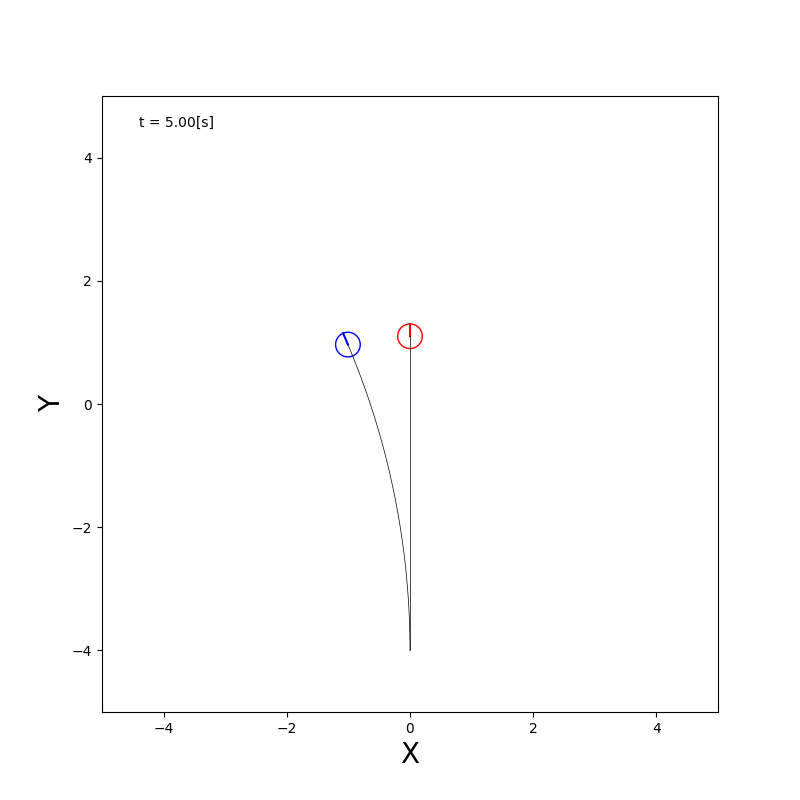

In [4]:
# time_span:シミュレート総時間、time_interval:サンプリング間隔
world = World(5, 0.1)

# オドメトリと実際の移動経路
#odom_wrl = np.array([math.pi/14.99, math.pi/15.00])
#act_wrl = np.array([math.pi/16.00, math.pi/15.00])
odom_nw = np.array([0.1, 0.0])
act_nw = np.array([0.1, math.pi/400.0])
odometry = IdealRobot(name="odom", nw=odom_nw, pose=np.array([0.0, -4.0, math.pi/2.0]).T, sensor=None, color="red", isBias=False)
actual = IdealRobot(name="act", nw=act_nw, pose=np.array([0.0, -4.0, math.pi/2.0]).T, sensor=None, color="blue", isBias=True)

world.append(odometry)
world.append(actual)

world.draw()

#for i in actual.poses:
#    print(i)

<IPython.core.display.Javascript object>


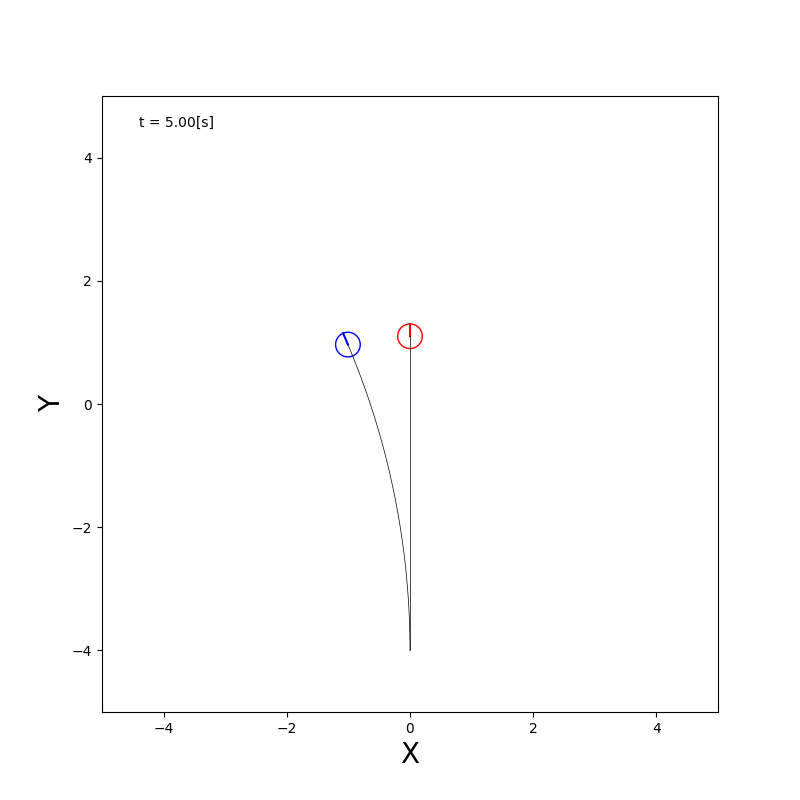

In [6]:
actual.save_data()

odometry.init_func()
actual.init_func()

odometry.set_wrl(np.array([0.1, 0.0]))
actual.set_wrl(np.array([0.1, math.pi/402]))

world.draw()

In [ ]:
actual.save_data()

odometry.init_func()
actual.init_func()

odometry.set_wrl(np.array([0.1, 0.0]))
actual.set_wrl(np.array([0.1, math.pi/404.0]))

world.draw()

In [ ]:
actual.save_data()

In [ ]:
actual.calibration()

In [ ]:
odometry.init_func()
actual.init_func()
world.draw()